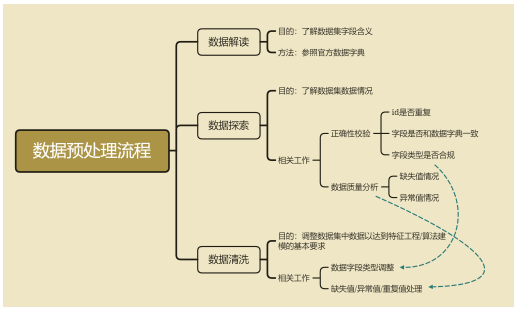

* 商户信息表数据解读

In [6]:
import pandas as pd

In [7]:
# 导入数据
merchant = pd.read_csv(r'E:\repo\ml_bt\elo\merchants.csv', header=0)
merchant.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [8]:
merchant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [5]:
# 在数据字典中查看各字段的解释
df = pd.read_excel(r'E:\repo\ml_bt\elo\Data_Dictionary.xlsx', header=2, sheet_name='merchant')
df

,Columns,Description
0,merchant_id,Unique merchant identifier
1,merchant_group_id,Merchant group (anonymized )
2,merchant_category_id,Unique identifier for merchant category (anony...
3,subsector_id,Merchant category group (anonymized )
4,numerical_1,anonymized measure
5,numerical_2,anonymized measure
6,category_1,anonymized category
7,most_recent_sales_range,Range of revenue (monetary units) in last acti...
8,most_recent_purchases_range,Range of quantity of transactions in last acti...
9,avg_sales_lag3,Monthly average of revenue in last 3 months di...


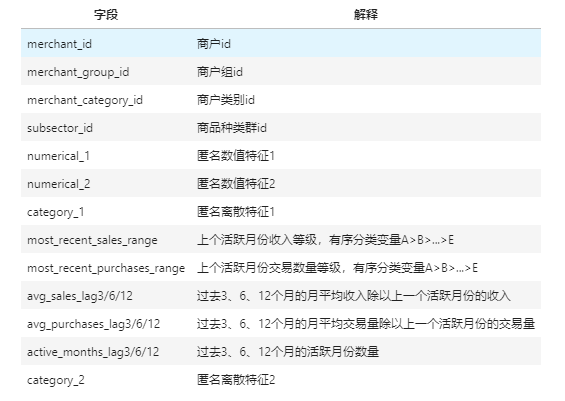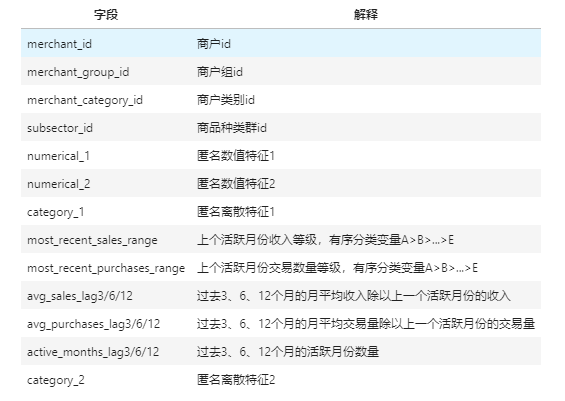

## 数据探索   
* 正确性校验   

In [9]:
print(merchant.shape, merchant['merchant_id'].nunique())

(334696, 22) 334633


能够看出，该表并不是一个id对应一条数据，存在一个商户有多条记录的情况。此外，由于商户特征较多，此处我们也可以简单验证商户数据特征是否和数据字典中特征一致：

In [12]:
pd.Series(merchant.columns.tolist()).sort_values().values

array(['active_months_lag12', 'active_months_lag3', 'active_months_lag6',
       'avg_purchases_lag12', 'avg_purchases_lag3', 'avg_purchases_lag6',
       'avg_sales_lag12', 'avg_sales_lag3', 'avg_sales_lag6',
       'category_1', 'category_2', 'category_4', 'city_id',
       'merchant_category_id', 'merchant_group_id', 'merchant_id',
       'most_recent_purchases_range', 'most_recent_sales_range',
       'numerical_1', 'numerical_2', 'state_id', 'subsector_id'],
      dtype=object)

In [15]:
pd.Series([va[0] for va in df.values]).sort_values().values

array(['active_months_lag12', 'active_months_lag3', 'active_months_lag6',
       'avg_purchases_lag12', 'avg_purchases_lag3', 'avg_purchases_lag6',
       'avg_sales_lag12', 'avg_sales_lag3', 'avg_sales_lag6',
       'category_1', 'category_2', 'category_4', 'city_id',
       'merchant_category_id', 'merchant_group_id', 'merchant_id',
       'most_recent_purchases_range', 'most_recent_sales_range',
       'numerical_1', 'numerical_2', 'state_id', 'subsector_id'],
      dtype=object)

In [16]:
print(pd.Series(merchant.columns.tolist()).sort_values().values ==  pd.Series([va[0] for va in df.values]).sort_values().values)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


能够看出商户特征完全一致。

* 缺失值分析

In [17]:
merchant.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

能够发现，第二个匿名分类变量存在较多缺失值，而avg_sales_lag3/6/12缺失值数量一致，则很有可能是存在13个商户同时确实了这三方面信息。

## 数据预处理

接下来对商户数据进行数据预处理。由于还未进行特征工程，此处预处理只是一些不影响后续特征工程、建模或多表关联的、较为初步但又是必须要做的预处理。

* 离散/连续字段标注

In [19]:
category_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'category_4', 'city_id', 'state_id', 'category_2']
numeric_cols = ['numerical_1', 'numerical_2',
     'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

In [22]:
# 检验特征是否划分完全  assert assert断言   在条件不满足程序运行的情况下直接返回错误, 而不必等待程序运行出现崩溃后再退出程序。
assert len(category_cols)+len(numeric_cols) == merchant.shape[1]

* 离散变量数据情况

In [23]:
# 查看分类变量的取值水平
merchant[category_cols].nunique()

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

In [24]:
# 查看分类变量目前的类别
merchant[category_cols].dtypes

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

In [25]:
# 查看离散变量的缺失值情况
merchant[category_cols].isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

* 离散变量的缺失值标注

注意到离散变量中的category_2存在较多缺失值，由于该分类变量取值水平为1-5，因此可以将缺失值先标注为-1，方便后续进行数据探索：

In [26]:
merchant['category_2'].unique()

array([ 1.,  5., nan,  2.,  3.,  4.])

In [27]:
merchant['category_2'] = merchant['category_2'].fillna(-1)

* 离散变量字典编码

接下来对离散变量进行字典编码，即将object对象类型按照sort顺序进行数值化（整数）编码。例如原始category_1取值为Y/N，通过sort排序后N在Y之前，因此在重新编码时N取值会重编码为0、Y取值会重编码为1。以此类推。

需要注意的是，从严格角度来说，变量类型应该是有三类，分别是        
   > * 连续性变量   
   > * 名义型变量       
   > * 有序变量           

连续变量较好理解         
所谓**名义变量**，指的是没有数值大小意义的分类变量，例如用1表示女、0表示男，0、1只是作为性别的指代，而没有1>0的含义。    
而所有**有序变量**，其也是离散型变量，但却有数值大小含义，如上述most_recent_purchases_range字段，销售等级中A>B>C>D>E，该离散变量的5个取值水平是有严格大小意义的，该变量就被称为有序变量。

在实际建模过程中，如果不需要提取有序变量的数值大小信息的话，可以考虑将其和名义变量一样进行独热编码。但本阶段初级预处理时暂时不考虑这些问题，先统一将object类型转化为数值型。

In [19]:
# 字典编码函数
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)), index=value)).values

In [29]:
merchant['category_1']

0         N
1         N
2         N
3         Y
4         Y
         ..
334691    N
334692    Y
334693    N
334694    Y
334695    N
Name: category_1, Length: 334696, dtype: object

In [30]:
change_object_cols(merchant['category_1'])

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

接下来，对merchant对象中的四个object类型列进行类别转化：

In [31]:
for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merchant[col] = change_object_cols(merchant[col])

* 连续变量的数据探索

In [32]:
# 查看连续变量的类别
merchant[numeric_cols].dtypes

numerical_1            float64
numerical_2            float64
avg_sales_lag3         float64
avg_purchases_lag3     float64
active_months_lag3       int64
avg_sales_lag6         float64
avg_purchases_lag6     float64
active_months_lag6       int64
avg_sales_lag12        float64
avg_purchases_lag12    float64
active_months_lag12      int64
dtype: object

In [33]:
# 连续变量的缺失值情况
merchant[numeric_cols].isnull().sum()

numerical_1             0
numerical_2             0
avg_sales_lag3         13
avg_purchases_lag3      0
active_months_lag3      0
avg_sales_lag6         13
avg_purchases_lag6      0
active_months_lag6      0
avg_sales_lag12        13
avg_purchases_lag12     0
active_months_lag12     0
dtype: int64

In [34]:
# 查看连续变量整体情况
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000
mean,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335
std,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138
min,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000
25%,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000
max,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000


据此我们发现连续型变量中存在部分缺失值，并且部分连续变量还存在无穷值inf，需要对其进行简单处理。

* 无穷值处理

In [36]:
import numpy as np
inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']
merchant[inf_cols] = merchant[inf_cols].replace(np.inf, merchant[inf_cols].replace(np.inf, -99).max().max())

In [37]:
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000
mean,0.011476,0.008103,13.832993,2.145143,2.994108,2.165079e+01,2.441947,5.947397,2.522771e+01,2.633572,11.599335
std,1.098154,1.070497,2395.489999,213.955844,0.095247,3.947108e+03,209.439373,0.394936,5.251842e+03,205.206198,1.520138
min,-0.057471,-0.057471,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000
25%,-0.057471,-0.057471,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,8.500000e-01,0.898333,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043361,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522,3.000000,1.230000e+00,1.215575,6.000000,1.290000e+00,1.266480,12.000000
max,183.735111,182.079322,851844.640000,61851.333333,3.000000,1.513959e+06,61851.333333,6.000000,2.567408e+06,61851.333333,12.000000


* 缺失值处理

不同于无穷值的处理，缺失值处理方法有很多。但该数据集缺失数据较少，33万条数据中只有13条连续特征缺失值，此处我们先简单采用均值进行填补处理，后续若有需要再进行优化处理。

In [38]:
for col in numeric_cols:
    merchant[col] = merchant[col].fillna(merchant[col].mean())

In [39]:
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,3.346960e+05,334696.000000,334696.000000,3.346960e+05,334696.000000,334696.000000
mean,0.011476,0.008103,13.832993,2.145143,2.994108,2.165079e+01,2.441947,5.947397,2.522771e+01,2.633572,11.599335
std,1.098154,1.070497,2395.443476,213.955844,0.095247,3.947031e+03,209.439373,0.394936,5.251740e+03,205.206198,1.520138
min,-0.057471,-0.057471,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000
25%,-0.057471,-0.057471,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,8.500000e-01,0.898333,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043361,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522,3.000000,1.230000e+00,1.215575,6.000000,1.290000e+00,1.266480,12.000000
max,183.735111,182.079322,851844.640000,61851.333333,3.000000,1.513959e+06,61851.333333,6.000000,2.567408e+06,61851.333333,12.000000


## 二、信用卡交易数据解读与探索

接下来对信用卡交易数据进行解读与探索。交易数据是本次竞赛中给出的规模最大、同时也是信息量最大的数据集，在后续建模过程中将发挥至关重要的作用。

### 1.数据解读与验证       
首先还是对数据集进行解释，以及简单验证数据集的正确性。信用卡交易记录包括了两个数据集，分别是historical_transactions和new_merchant_transactions。两个数据集字段类似，只是记录了不同时间区间的信用卡消费情况：

* historical_transactions：信用卡消费记录

该数据集记录了每张信用卡在特定商户中、三个月间的消费记录。该数据集数据规模较大，文件约有2.6G，并非必要建模字段，但若能从中提取有效信息，则能够更好的辅助建模。

In [1]:
import datatable
import pandas as pd

In [11]:
path = r'E:\repo\ml_bt\elo\historical_transactions.csv'
with open(path) as f:
    data = pd.read_csv(path, sep=',',engine = 'python',iterator=True)
    loop = True
    index,chunkSize,chunks = 0,1000,[]
    while loop:
        try:
#             print(index)
            chunk = data.get_chunk(chunkSize)
            chunks.append(chunk)
            index+=1
        except StopIteration:
            loop = False
            print("Iteration is stopped.")
print('开始合并')
data = pd.concat(chunks, ignore_index= True)

KeyboardInterrupt: 

In [2]:
path = r'E:\repo\ml_bt\elo\historical_transactions.csv'
# history_transaction = pd.read_csv(r'E:\repo\ml_bt\elo\historical_transactions.csv', header=0)
history_transaction = datatable.fread(path).to_pandas()

In [3]:
history_transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [5]:
history_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   authorized_flag       object        
 1   card_id               object        
 2   city_id               int32         
 3   category_1            object        
 4   installments          int32         
 5   category_3            object        
 6   merchant_category_id  int32         
 7   merchant_id           object        
 8   month_lag             int32         
 9   purchase_amount       float64       
 10  purchase_date         datetime64[ns]
 11  category_2            float64       
 12  state_id              int32         
 13  subsector_id          int32         
dtypes: datetime64[ns](1), float64(2), int32(6), object(5)
memory usage: 2.4+ GB


能够看到，数据集总共包括将近三千万条数据，总共有十四个字段，每个字段在数据字典中的解释如下：

In [8]:
pd.read_excel(r'E:\repo\ml_bt\elo\Data_Dictionary.xlsx', header=2, sheet_name='history')

,Columns,Description
0,card_id,Card identifier
1,month_lag,month lag to reference date
2,purchase_date,Purchase date
3,authorized_flag,"Y' if approved, 'N' if denied"
4,category_3,anonymized category
5,installments,number of installments of purchase
6,category_1,anonymized category
7,merchant_category_id,Merchant category identifier (anonymized )
8,subsector_id,Merchant category group identifier (anonymized )
9,merchant_id,Merchant identifier (anonymized)


实际含义

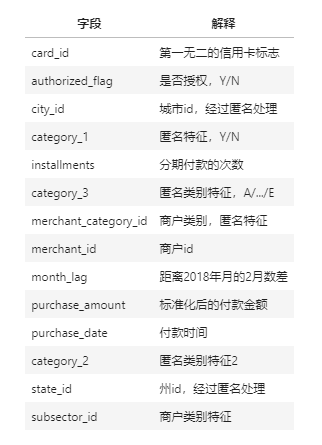

* new_merchant_transactions：信用卡近期的交易信息            
信用卡在2018年2月之后的交易信息，和historical_transactions字段完全一致。

In [9]:
new_transaction = pd.read_csv(r'E:\repo\ml_bt\elo\new_merchant_transactions.csv', header=0)
new_transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [10]:
new_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


该数据中总共有将近200万条数据。并且我们发现，该数据集中有较多字段和商家数据merchant重复，我们可以对其进行简单检验。

对比merchant数据集，首先简单查看有哪些字段一致

In [11]:
merchant = pd.read_csv(r'E:\repo\ml_bt\elo\merchants.csv', header=0)

In [12]:
duplicate_cols = []

for col in merchant.columns:
    if col in new_transaction.columns:
        duplicate_cols.append(col)
        
print(duplicate_cols)

['merchant_id', 'merchant_category_id', 'subsector_id', 'category_1', 'city_id', 'state_id', 'category_2']


并且我们进一步发现，交易记录中的merhcant_id信息并不唯一：

In [13]:
# 取出和商户数据表重复字段并去重
new_transaction[duplicate_cols].drop_duplicates().shape

(291242, 7)

In [14]:
# 商户id去重
new_transaction['merchant_id'].nunique()

226129

造成该现象的原因可能是商铺在逐渐经营过程动态变化，而基于此，在后续的建模过程中，我们将优先使用交易记录中表中的相应记录。

### 2.数据预处理

* 连续/离散字段标注

首先也是一样，需要对其连续/离散变量进行标注。当然该数据集中比较特殊的一点，是存在一个时间列，我们将其单独归为一类：

In [15]:
numeric_cols = ['installments', 'month_lag', 'purchase_amount']
category_cols = ['authorized_flag', 'card_id', 'city_id', 'category_1',
       'category_3', 'merchant_category_id', 'merchant_id', 'category_2', 'state_id',
       'subsector_id']
time_cols = ['purchase_date']

assert len(numeric_cols) + len(category_cols) + len(time_cols) == new_transaction.shape[1]

* 字段类型转化/缺失值填补    
  然后简单查看离散变量当前数据情况：

In [16]:
# 查看分类变量的类别
new_transaction[category_cols].dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
category_3               object
merchant_category_id      int64
merchant_id              object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [17]:
new_transaction[category_cols].isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
category_3               55922
merchant_category_id         0
merchant_id              26216
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

和此前的merchant处理类似，我们对其object类型对象进行字典编码（id除外），并对利用-1对缺失值进行填补：

In [20]:
for col in ['authorized_flag', 'category_1', 'category_3']:
    new_transaction[col] = change_object_cols(new_transaction[col].fillna(-1).astype(str))
    
new_transaction[category_cols] = new_transaction[category_cols].fillna(-1)

In [21]:
new_transaction[category_cols].dtypes

authorized_flag           int64
card_id                  object
city_id                   int64
category_1                int64
category_3                int64
merchant_category_id      int64
merchant_id              object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

## 三、数据清洗后数据生成

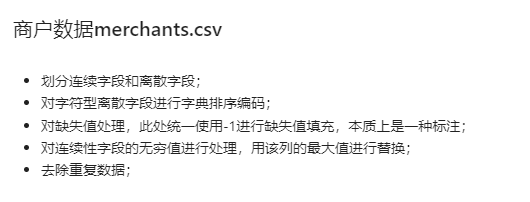

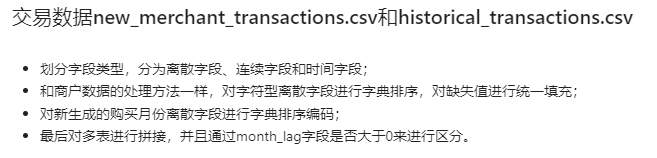

## 统一执行所有数据的数据清洗工作，并将其最终保存为本地文件，方便后续特征工程及算法建模过程使用，其流程如下：

* 读取数据

In [1]:
import gc
import time
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
history_transaction = pd.read_csv(r'E:\repo\ml_bt\elo\historical_transactions.csv')
train = pd.read_csv(r'E:\repo\ml_bt\elo\train.csv')
test =  pd.read_csv(r'E:\repo\ml_bt\elo\test.csv')
merchant = pd.read_csv(r'E:\repo\ml_bt\elo\merchants.csv')
new_transaction = pd.read_csv(r'E:\repo\ml_bt\elo\new_merchant_transactions.csv')

MemoryError: Unable to allocate 1.30 GiB for an array with shape (6, 29112361) and data type int64

In [ ]:
# 字典编码函数
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)), index=value)).values

* 训练集/测试集的数据预处理

In [ ]:
# 对首次活跃月份进行编码
se_map = change_object_cols(train['first_active_month'].append(test['first_active_month']).astype(str))
train['first_active_month'] = se_map[:train.shape[0]]
test['first_active_month'] = se_map[train.shape[0]:]

* 测试集/训练集导出与内存清理

In [ ]:
train.to_csv("preprocess/train_pre.csv", index=False)
test.to_csv("preprocess/test_pre.csv", index=False)

In [ ]:
del train
del test
gc.collect()

* 商户信息预处理

In [ ]:
# 1、根据业务含义划分离散字段category_cols与连续字段numeric_cols。
category_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'category_4', 'city_id', 'state_id', 'category_2']
numeric_cols = ['numerical_1', 'numerical_2',
     'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

# 2、对非数值型的离散字段进行字典排序编码。
for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merchant[col] = change_object_cols(merchant[col])
    
# 3、为了能够更方便统计，进行缺失值的处理，对离散字段统一用-1进行填充。
merchant[category_cols] = merchant[category_cols].fillna(-1)


# 4、对离散型字段探查发现有正无穷值，这是特征提取以及模型所不能接受的，因此需要对无限值进行处理，此处采用最大值进行替换。
inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']
merchant[inf_cols] = merchant[inf_cols].replace(np.inf, merchant[inf_cols].replace(np.inf, -99).max().max())

# 5、平均值进行填充，后续有需要再进行优化处理。
for col in numeric_cols:
    merchant[col] = merchant[col].fillna(merchant[col].mean())
    
# 6、去除与transaction交易记录表格重复的列，以及merchant_id的重复记录。
duplicate_cols = ['merchant_id', 'merchant_category_id', 'subsector_id', 'category_1', 'city_id', 'state_id', 'category_2']
merchant = merchant.drop(duplicate_cols[1:], axis=1)
merchant = merchant.loc[merchant['merchant_id'].drop_duplicates().index.tolist()].reset_index(drop=True)

* 交易数据预处理

In [ ]:
# 1、为了统一处理，首先拼接new和history两张表格，后续可以month_lag>=0进行区分。
transaction = pd.concat([new_transaction, history_transaction], axis=0, ignore_index=True)
del new_transaction
del history_transaction
gc.collect()

# 2、同样划分离散字段、连续字段以及时间字段。
numeric_cols = [ 'installments', 'month_lag', 'purchase_amount']
category_cols = ['authorized_flag', 'card_id', 'city_id', 'category_1',
       'category_3', 'merchant_category_id', 'merchant_id', 'category_2', 'state_id',
       'subsector_id']
time_cols = ['purchase_date']

# 3、可仿照merchant的处理方式对字符型的离散特征进行字典序编码以及缺失值填充。
for col in ['authorized_flag', 'category_1', 'category_3']:
    transaction[col] = change_object_cols(transaction[col].fillna(-1).astype(str))
transaction[category_cols] = transaction[category_cols].fillna(-1)
transaction['category_2'] = transaction['category_2'].astype(int)

# 4、进行时间段的处理，简单起见进行月份、日期的星期数（工作日与周末）、以及
# 时间段（上午、下午、晚上、凌晨）的信息提取。
transaction['purchase_month'] = transaction['purchase_date'].apply(lambda x:'-'.join(x.split(' ')[0].split('-')[:2]))
transaction['purchase_hour_section'] = transaction['purchase_date'].apply(lambda x: x.split(' ')[1].split(':')[0]).astype(int)//6
transaction['purchase_day'] = transaction['purchase_date'].apply(lambda x: datetime.strptime(x.split(" ")[0], "%Y-%m-%d").weekday())//5                                                                    
del transaction['purchase_date']


# 5、对新生成的购买月份离散字段进行字典序编码。
transaction['purchase_month'] = change_object_cols(transaction['purchase_month'].fillna(-1).astype(str))

完成交易数据预处理后，即可进行交易数据和商铺数据的表格合并。

* 表格合并

在合并的过程中，有两种处理方案，其一是对缺失值进行-1填补，然后将所有离散型字段化为字符串类型（为了后续字典合并做准备），其二则是新增两列，分别是purchase_day_diff和purchase_month_diff，其数据为交易数据以card_id进行groupby并最终提取出purchase_day/month并进行差分的结果。

方案一代码如下：

In [ ]:
# 为了方便特征的统一计算将其merge合并，重新划分相应字段种类。
cols = ['merchant_id', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']
transaction = pd.merge(transaction, merchant[cols], how='left', on='merchant_id')

numeric_cols = ['purchase_amount', 'installments']

category_cols = ['authorized_flag', 'city_id', 'category_1',
       'category_3', 'merchant_category_id','month_lag','most_recent_sales_range',
                 'most_recent_purchases_range', 'category_4',
                 'purchase_month', 'purchase_hour_section', 'purchase_day']

id_cols = ['card_id', 'merchant_id']

transaction[cols[1:]] = transaction[cols[1:]].fillna(-1).astype(int)
transaction[category_cols] =transaction[category_cols].fillna(-1).astype(str)

In [ ]:
transaction.to_csv("preprocess/transaction_d_pre.csv", index=False)

In [ ]:
del transaction
gc.collect()